<a href="https://colab.research.google.com/github/123Cub123Cub1234/Statistical-Learning-Work/blob/main/STAT4360_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as st
from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import roc_curve, confusion_matrix, accuracy_score

In [ ]:
# Question 1

# load data
wine = pd.read_table('wine.txt')

# convert Region to categorical variable
wine['Region'] = pd.cut(wine.Region, bins = [0, 1, 2, 3], labels= ["Region1", 'Region2', 'Region3'])

# move Quality column to end of table
temp = wine['Quality']
wine = wine.drop(columns=['Quality'])
wine['Quality'] = temp

In [ ]:
# (a)

# summary statistics
wine.describe()

# boxplot
wine.boxplot()

# correlation heatmap
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(wine.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [ ]:
# (b)

# fit linear regression model

for header in wine.columns:
  var = wine[header]
  model1 = ols('Quality ~ var',data=wine).fit()

# view model summary
  print("Data for {}".format(header))
  print(model1.summary())

  # plot fitted line
  fig, ax = plt.subplots(figsize=(8, 6))
  ax.plot(var, wine['Quality'], "o", label="data")
  ax.plot(var, model1.fittedvalues, "r-", label="OLS")
  ax.legend(loc="best")
  ax.title.set_text(header)
  plt.show()

In [ ]:
# (c)
# fit model with all variables

model1 = ols('Quality ~ Clarity + Aroma + Body + Flavor + Oakiness + Region',data=wine).fit()
print(model1.summary())

In [ ]:
# (d)

model1 = ols('Quality ~ Flavor + Region',data=wine).fit()
table = sm.stats.anova_lm(model1, typ=2)
print(table)
print(model1.summary())

# Residual plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(model1.fittedvalues, model1.resid, "o", label="residual")
ax.hlines(0, min(model1.fittedvalues), max(model1.fittedvalues), color='red')
ax.legend(loc="best")

# QQplot
fig = sm.qqplot(model1.resid)
plt.show()

# Time series
plt.plot(model1.resid)
plt.hlines(0, 0, wine.shape[0], color='red')

In [ ]:
# (e)

# Quality = 7.0943 - 1.5335(Region2) + 1.2234(Region3) + 1.1155(Flavor)

In [ ]:
# (f)

# Quality = 7.0943 + 1.1155(4.7684) = 12.4135

# 95% confidence interval
conf_95 = model1.t_test([1, 0, 0, wine.Flavor.mean()])
print(conf_95)

# 95% prediction interval
regions = wine['Region'].unique()
flavor_mean = wine['Flavor'].mean()

final_data = pd.DataFrame({'Flavor': flavor_mean, 'Region': regions})
predicted_quality = model1.get_prediction(final_data)

pred_95 = predicted_quality.conf_int(alpha = 0.05)
print(pred_95)

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            12.4137      0.227     54.583      0.000      11.952      12.876
[[11.95151599 12.87590324]
 [13.03269331 14.24145826]
 [10.25866484 11.50178564]]


In [ ]:
# Question 2

# load and clean data
diabetes = pd.read_csv('diabetes.csv')

diabetes.columns = diabetes.columns.str.replace('\n', '')
diabetes.columns = diabetes.columns.str.replace(' ', '')

       Pregnancies      Glucose  BloodPressure  SkinThickness      Insulin  \
count  2000.000000  2000.000000    2000.000000    2000.000000  2000.000000   
mean      3.703500   121.182500      69.145500      20.935000    80.254000   
std       3.306063    32.068636      19.188315      16.103243   111.180534   
min       0.000000     0.000000       0.000000       0.000000     0.000000   
25%       1.000000    99.000000      63.500000       0.000000     0.000000   
50%       3.000000   117.000000      72.000000      23.000000    40.000000   
75%       6.000000   141.000000      80.000000      32.000000   130.000000   
max      17.000000   199.000000     122.000000     110.000000   744.000000   

               BMI  DiabetesPedigreeFunction          Age      Outcome  
count  2000.000000               2000.000000  2000.000000  2000.000000  
mean     32.193000                  0.470930    33.090500     0.342000  
std       8.149901                  0.323553    11.786423     0.474498  
min  

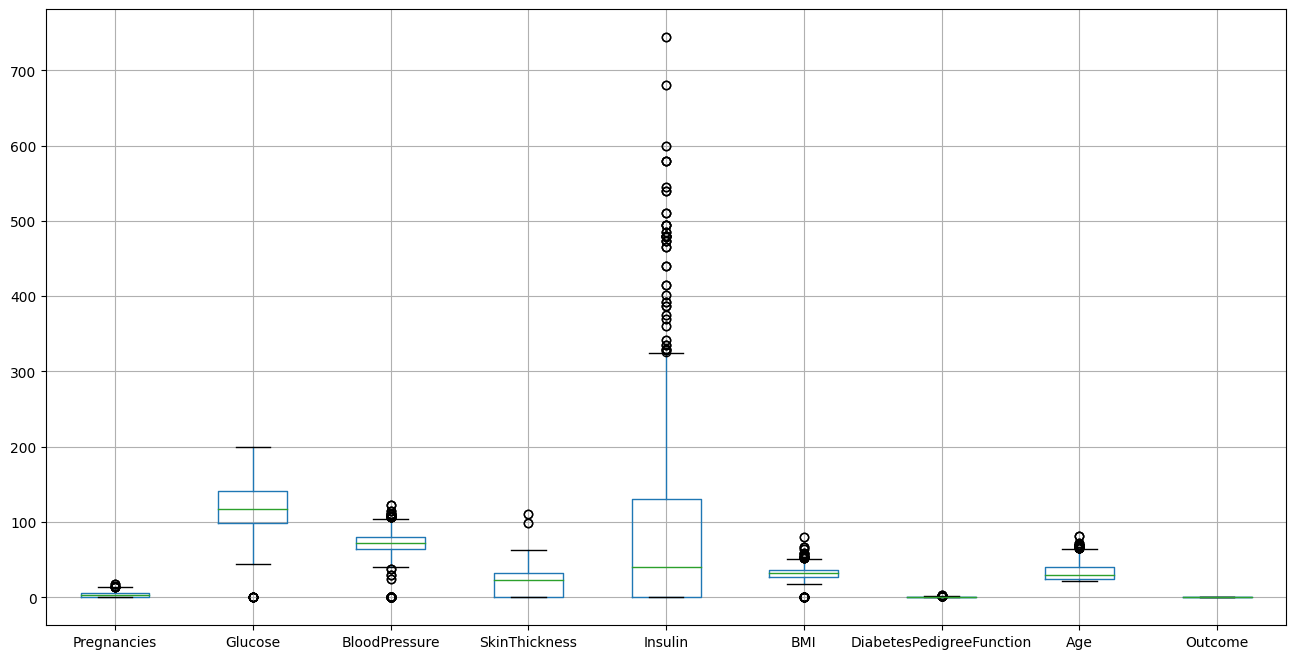

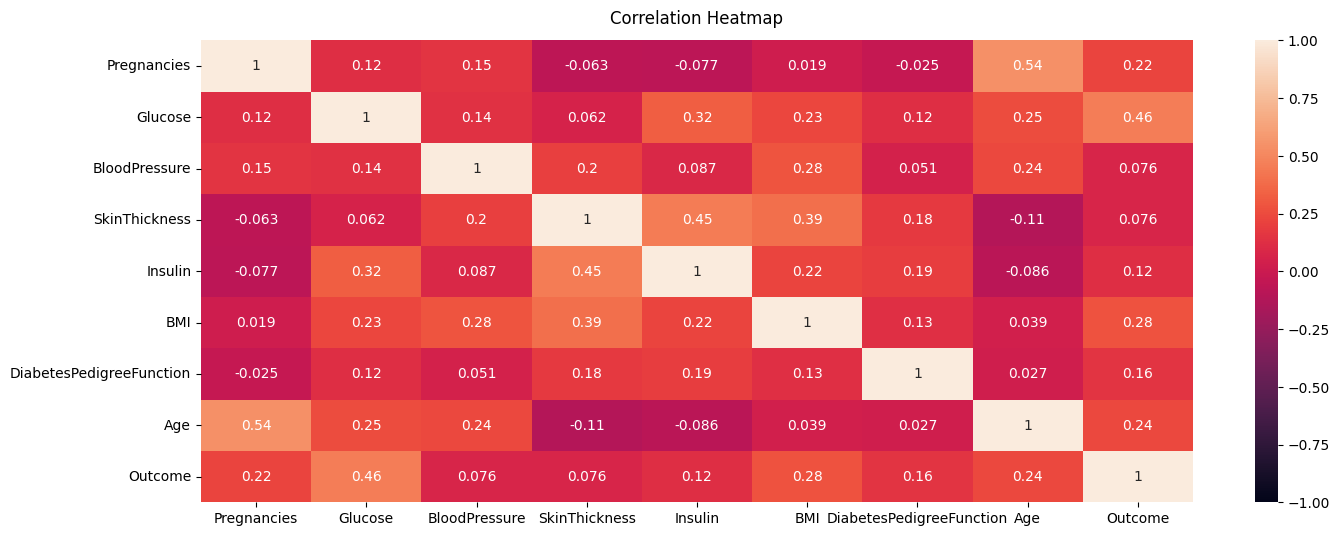

In [ ]:
# (a)

# summary statistics
print(diabetes.describe())

# boxplot
plt.figure(figsize=(16, 8))
diabetes.boxplot()


# correlation heatmap
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(diabetes.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [ ]:
# (b)
y = diabetes['Outcome']
X = diabetes.drop(columns=['Outcome'])

# LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

# confusion matrix
ldapred = lda.predict(X)
confusion_matrix = pd.crosstab(ldapred, y, rownames = ['predict'], colnames = ['test'])
print(confusion_matrix)

posterior_probability = lda.predict_proba(X)[:, 1]
y_pred = (posterior_probability >= 0.5).astype(int)

# misclassification rate
misclassification_rate = 1 - accuracy_score(y, y_pred)
print(misclassification_rate)

conf_matrix = confusion_matrix(y, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(sensitivity)
print(specificity)

# ROC curve
plt.figure(figsize=(6, 6))
plt.plot(roc_curve(y, posterior_probability)[0], roc_curve(y, posterior_probability)[1])
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.grid(True)
plt.show()

test        0    1
predict           
0        1135  290
1         181  394
0.23550000000000004


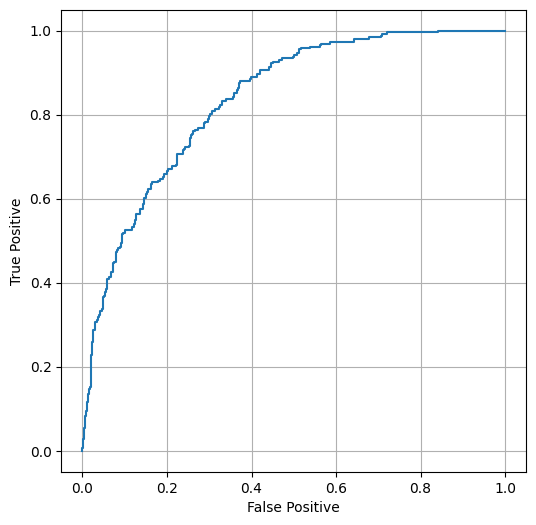

In [ ]:
# (c)
# QDA
qda = QuadraticDiscriminantAnalysis()
qda.fit(X, y)

# confusion matrix
qdapred = qda.predict(X)
confusion_matrix = pd.crosstab(qdapred, y, rownames = ['predict'], colnames = ['test'])
print(confusion_matrix)

posterior_probability = qda.predict_proba(X)[:, 1]
y_pred = (posterior_probability >= 0.5).astype(int)

# misclassification rate
misclassification_rate = 1 - accuracy_score(y, y_pred)
print(misclassification_rate)

# ROC curve
plt.figure(figsize=(6, 6))
plt.plot(roc_curve(y, posterior_probability)[0], roc_curve(y, posterior_probability)[1])
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.grid(True)
plt.show()

In [ ]:
# Part (B) - LDA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import roc_curve, confusion_matrix, accuracy_score

x_train = diabetes[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y_train = diabetes['Outcome']

lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)

y_pred = lda.predict(x_train)
posterior_probs = lda.predict_proba(x_train)[:, 1]

y_pred_binary = (posterior_probs >= 0.5).astype(int)

conf_matrix = confusion_matrix(y_train, y_pred_binary)

tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

misclassification_rate = 1 - accuracy_score(y_train, y_pred_binary)


print(f"Sensitivity: {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"Misclassification Rate: {misclassification_rate:.2f}")

Sensitivity: 0.56
Specificity: 0.89
Misclassification Rate: 0.22
